### Understanding Learning Rate

\begin{align} 
P_t  =  & P_{t-1} + \alpha(R_{t-1}-P_{t-1}) \\
= &  (1-\alpha)P_{t-1} + \alpha R_{t-1}\\
 = & (1-\alpha)(P_{t-2} + \alpha(R_{t-2}-P_{t-2})) + \alpha R_{t-1}\\
& \vdots\\
= &  (1-\alpha)^t P_0 + \sum_{i=1}^{t}(1-\alpha)^{t-i} \alpha R_i
\end{align}

Let's assume $\alpha=.5$ and $t=10$

then

\begin{align}
P_{10} = &.5^{10} P_0 + .5^{10} R_{1}+ .5^9 R_{2}+  \cdots + .5^3 R_{8}+ .5^2 R_{9}+ .5 R_{10}\\
 = & 0.00097 P_0 + 0.00097 R_{1}+ .0.0019 R_{2}+  \cdots  + .125 R_{98}+ .25 R_{9}+ .5 R_{10}

\end{align} 

Classical RL seems to be a kind of Moving Weighted Average

In [72]:
import numpy as np
import matplotlib.pylab as plt
from scipy import stats

In [16]:
# Here is the function of weighted variability in the above rephrasing formula
def weight_rpe(alpha=.5, t = 10):
    lst_weighted = []
    for i in range(1, t+1):
        lst_weighted.append((1-alpha)**(t-i)*alpha)
    return lst_weighted

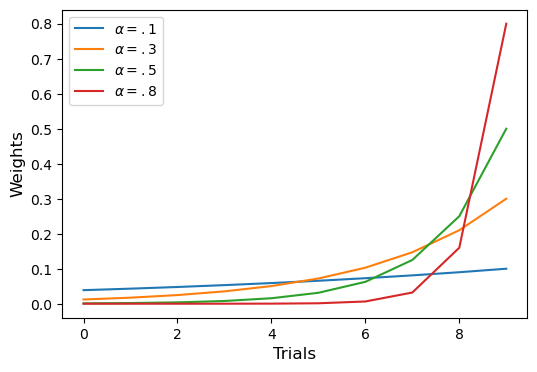

In [50]:
fig = plt.figure(figsize=(6, 4))
# some options for alpha
alphas = [.1, .3 , .5, .8]
for i in range(len(alphas)):
    weights_return = weight_rpe(alpha=alphas[i], t =10)
    plt.plot(weights_return)


plt.xlabel('Trials', fontsize='12')
plt.ylabel('Weights', fontsize='12')
plt.legend([r'$\alpha = .1$', r'$\alpha =.3$', r'$\alpha =.5$', r'$\alpha =.8$'])

In [131]:
"""Property of the correlation between subcomponent of RPE"""
# Reward sampled from binomial distribution 
R = np.random.uniform(size=100)
# prediction
P = np.random.uniform(size=100)
# Reward prediction Erro
RPE = R - P

# whether reward and prediction are correlated
print('Correlation of reward and prediction: ', stats.spearmanr(R, P))
# Both reward and prediction are corralted with reward prediction error
print('Correlation of reward and RPE: ', stats.spearmanr(R, RPE))
print('Correlation od prediction and RPE: ', stats.spearmanr(R, RPE))

Correlation of reward and prediction:  SignificanceResult(statistic=-0.008316831683168317, pvalue=0.934548033522191)
Correlation of reward and RPE:  SignificanceResult(statistic=0.6927812781278126, pvalue=1.4009201948519506e-15)
Correlation od prediction and RPE:  SignificanceResult(statistic=0.6927812781278126, pvalue=1.4009201948519506e-15)


In [ ]:
# Quesiton, alpha is recover for each task design